## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Author : Anoop Kumar

# Libraries

In [1]:
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)

1. shape, info(), describe(), value_counts()
2. barplot()
      

In [2]:
data = pd.read_csv('percentage.csv')

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data['Hours'].value_counts()

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64

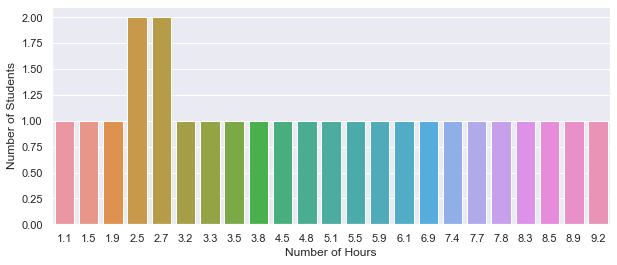

In [8]:
sns.set(rc={'figure.figsize':(10,4)})  
sns.barplot(data['Hours'].value_counts().index,data['Hours'].value_counts()).set(xlabel="Number of Hours", ylabel = "Number of Students")
plt.show()

## Data Normalization
1. boxplot()

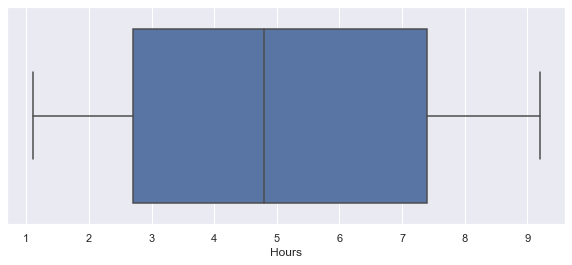

In [9]:
sns.boxplot(data['Hours'])

## Feature engineering
1. scatter()

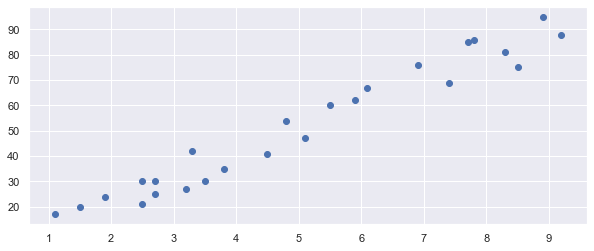

In [67]:
plt.scatter(data['Hours'],data['Scores'])

 **From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

## Preparing the data for model
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [45]:
feature = data.iloc[:,:1].values
label = data.iloc[:,-1].values

## Training the Algorithm
Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:
We have split our data into training and testing sets, and now is finally the time to train our algorithm.    

In [47]:
X_train, X_test, y_train, y_test =  train_test_split(feature,label,test_size= 0.20, random_state=2)
Linea_model =  LinearRegression()  
Linea_model.fit(X_train,y_train)

trainscore = Linea_model.score(X_train,y_train)
testscore = Linea_model.score(X_test,y_test)
print("test score: {} train score: {}".format(testscore,trainscore))

test score: 0.9735538080811826 train score: 0.9423348138802985


## Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [65]:
y_pred = Linea_model.predict(X_test)
y_pred

array([12.44258714, 26.35944834, 20.39507925, 92.9615698 , 70.09815497])

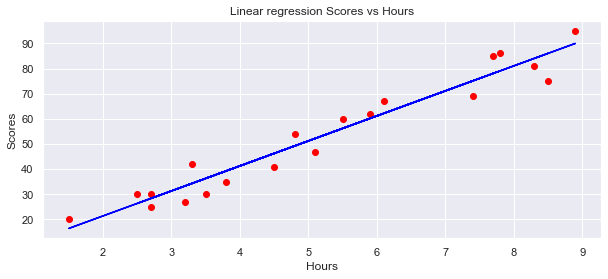

In [49]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,Linea_model.predict(X_train),color='blue')
plt.title('Linear regression Scores vs Hours')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [50]:

print("mean squared error :",mean_squared_error(y_test,y_pred))
print("r2_scorer :",r2_score(y_test,y_pred))
print("rmse :",sqrt(mean_squared_error(y_test,y_pred)))

mean squared error : 24.38762033985666
r2_scorer : 0.9735538080811826
rmse : 4.938382360637607


## Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

What will be predicted score if a student studies for 9.25 hrs/ day?

In [64]:
print("if a student studies for 9.25 hrs/ ay then the student score:",float(Linea_model.predict([[9.25]]))," can be.")

if a student studies for 9.25 hrs/ ay then the student score: 93.45860055685799  can be.
